# IS709 Assignment 1

### Due: November 8, Sunday-23.59

### Submission and Grading Policy

- Submit your assignments to the corresponding assignment link in https://odtuclass.metu.edu.tr.
- Solutions should be submitted in a single **ipynb** file named: metu-username_HW_1.ipynb (e.g., “e123456_HW_1.ipynb”).
- Late submissions will be accepted by November 11, 2020, 23:59 with a 5% per day penalty.
- Do not change variable names in the code blocks and the texts in the markdowns.
- **<font color=#C91414>This is an individual assignment. Please do not collaborate. You have to adhere to the academic integrity principles.</font>** 
- You are supposed to be able to interpret your findings. Therefore, you should not find a number or result and just leave it. You also need to comment on your findings by giving as much as **necessary** details.

------------

### The aim of this assignment is getting you familiar with
- Python and Jupyter notebook
- simple data cleaning
- descriptive statistics interpretation and
- visualizing methods


**1. Import pandas, numpy, matplotlib and seaborn libraries.**  
If you need another library or packages, you may upload them too.

In [1]:
from scipy import stats
import statsmodels.api as sm 
import pylab as py 

### answer ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\ozan\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**2. Upload the data as a pandas dataframe and show the first seven rows.**

In [2]:
### answer ###
data=pd.read_csv("data.csv")
type(data)
data.head(7)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
0,f,s,26.5718,67.348444,55.735348,3,33.1432,10.3969,0.2220,NaN,10.7287,0
1,m,d,36.9867,35.929227,53.955549,4,20.2044,17.5688,0.8707,d,NaN,0
2,f,s,33.4149,39.798079,48.001968,0,23.1969,12.8849,0.2067,a,NaN,0
3,f,d,24.4685,37.641862,51.138087,2,25.4451,16.4271,0.9186,d,28.3842,0
4,m,s,29.1070,21.628446,53.033621,1,18.2665,29.0812,0.4884,NaN,16.8185,0
5,m,m,40.2572,35.131606,50.188982,1,23.0124,13.8663,0.6117,c,NaN,0
6,f,m,19.8666,54.929858,46.069347,2,22.9947,13.4770,0.7659,d,3.8144,0


We have uploaded "data.csv" file, checked type of dataframe and showed the first seven rows of the data.

In [3]:
type(data)

pandas.core.frame.DataFrame

----------
### Data Explanation
**x1:** f,m  
**x2:** s,d,m   
**x3:** continuous   
**x4:** continuous   
**x5:** continuous   
**x6:** 0, 1, 2, 3, 4, 5, 6   
**x7:** continuous   
**x8:** continuous   
**x9:** continuous    
**x10:** a,b,c,d     
**x11:** continuous      
**x12:** 0, 1

**3. What is the shape/size of the data set?**

In [4]:
### answer ###
data.shape

(1000, 12)

In [5]:
data.size

12000

shape: The number of elements stored along each dimension of the array.
size: The total number of elements of the array.

### <span style="background-color:#C91414">Usually you need to deal with low quality data </span> 

**4.Encode the x1, x2 and x10 as stated below.**       
For x1; f=0, m=1   
For x2; s=0 ,d=1, m=2   
For x10; a=0 ,b=1 ,c=2 ,d=3  

In [6]:
data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
0,f,s,26.5718,67.348444,55.735348,3,33.1432,10.3969,0.2220,NaN,10.7287,0
1,m,d,36.9867,35.929227,53.955549,4,20.2044,17.5688,0.8707,d,NaN,0
2,f,s,33.4149,39.798079,48.001968,0,23.1969,12.8849,0.2067,a,NaN,0
3,f,d,24.4685,37.641862,51.138087,2,25.4451,16.4271,0.9186,d,28.3842,0
4,m,s,29.1070,21.628446,53.033621,1,18.2665,29.0812,0.4884,NaN,16.8185,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,f,s,35.1738,40.167278,10.861569,6,51.7294,69.9084,0.0472,a,19.0909,0
996,f,m,37.3496,51.869964,40.358008,2,48.0998,54.7872,0.6657,c,NaN,0
997,f,d,27.4534,30.696768,44.062608,4,55.4192,63.6438,0.8696,d,8.8527,0
998,f,s,34.3513,36.779062,41.305448,2,56.3997,63.0247,0.3104,a,13.9052,0


In [7]:
replace_map = {"x1": {"f":"0", "m":"1"},
               "x2": {"s":"0", "d":"1", "m":"2"},
               "x10":{"a":"0", "b":"1", "c":"2", "d":"3"}}

data.replace(replace_map, inplace =True)

In [8]:
data.dtypes

x1      object
x2      object
x3     float64
x4     float64
x5     float64
x6       int64
x7     float64
x8     float64
x9     float64
x10     object
x11    float64
x12      int64
dtype: object

Before changing values of x1,x2 and x10, data type of x1,x2 and x10 are object. After changing values, data types remain same as object.Also, their values have changed as expected.

Notice that although some columns contain numerical values, they are not reflected in the describe() method. The reason of this, these columns are read as string. To fix these issues,  
**5.Convert all the columns of the dataframe to numeric.**    
Please be aware that the numeric encoding of a column does not mean that the variable/attribute itself is numerical.  
Hint:  x1 attribute
   

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
x3,993.0,31.823266,5.005372,15.844700,28.587300,31.803400,35.367500,49.857900
x4,1000.0,50.610333,26.549140,12.010699,32.845424,42.460382,62.894055,182.383397
x5,1000.0,43.278382,9.505879,-6.402771,39.385384,45.366742,49.653367,72.008771
x6,1000.0,3.002000,1.470428,0.000000,2.000000,3.000000,4.000000,6.000000
x7,1000.0,40.339047,15.747698,4.505000,24.688050,45.510050,53.624300,73.002200
x8,1000.0,43.826448,24.403868,10.007100,14.962850,57.748800,66.409450,69.998700
x9,991.0,0.497563,0.286414,0.000400,0.252050,0.502700,0.748750,0.998500
x11,751.0,24.271198,11.265192,1.556400,14.924650,24.798600,33.737650,55.054000
x12,1000.0,0.086000,0.280504,0.000000,0.000000,0.000000,0.000000,1.000000


In [10]:
### answer ###
data = data.apply(pd.to_numeric)

**6.Rename the name of "x12" column as "target"**

In [11]:
print(data.columns) ## .columns returns the column names of the DataFrame.

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12'],
      dtype='object')


In [12]:
### answer ###
data.rename(columns = {'x12':'target'}, inplace = True)

In [13]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,target
0,0,0.0,26.5718,67.348444,55.735348,3,33.1432,10.3969,0.2220,NaN,10.7287,0
1,1,1.0,36.9867,35.929227,53.955549,4,20.2044,17.5688,0.8707,3.0,NaN,0
2,0,0.0,33.4149,39.798079,48.001968,0,23.1969,12.8849,0.2067,0.0,NaN,0
3,0,1.0,24.4685,37.641862,51.138087,2,25.4451,16.4271,0.9186,3.0,28.3842,0
4,1,0.0,29.1070,21.628446,53.033621,1,18.2665,29.0812,0.4884,NaN,16.8185,0


Notice that some data points are missing.     
**7. Find and print the number of missing values in each column**

In [14]:
### answer ###
data.isnull().sum()

x1          0
x2         15
x3          7
x4          0
x5          0
x6          0
x7          0
x8          0
x9          9
x10       140
x11       249
target      0
dtype: int64

**8. Drop the columns which have more than %10 missing value rate.**

In [15]:
### answer ###
null_sum = data.isnull().sum()
percent = ((null_sum / len(data.index))*100)
df_NA = pd.concat([null_sum, percent], axis=1, keys=['Number of NA', 'Percent of NA'])
df_NA

,Number of NA,Percent of NA
x1,0,0.0
x2,15,1.5
x3,7,0.7
x4,0,0.0
x5,0,0.0
x6,0,0.0
x7,0,0.0
x8,0,0.0
x9,9,0.9
x10,140,14.0


As you can see from above table, x10 and x11 have more than 10% missing value rates. Therefore, they have dropped at the below.

In [16]:
data.drop(columns=['x10', 'x11'], inplace=True)

In [17]:
data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,target
0,0,0.0,26.5718,67.348444,55.735348,3,33.1432,10.3969,0.2220,0
1,1,1.0,36.9867,35.929227,53.955549,4,20.2044,17.5688,0.8707,0
2,0,0.0,33.4149,39.798079,48.001968,0,23.1969,12.8849,0.2067,0
3,0,1.0,24.4685,37.641862,51.138087,2,25.4451,16.4271,0.9186,0
4,1,0.0,29.1070,21.628446,53.033621,1,18.2665,29.0812,0.4884,0
...,...,...,...,...,...,...,...,...,...,...
995,0,0.0,35.1738,40.167278,10.861569,6,51.7294,69.9084,0.0472,0
996,0,2.0,37.3496,51.869964,40.358008,2,48.0998,54.7872,0.6657,0
997,0,1.0,27.4534,30.696768,44.062608,4,55.4192,63.6438,0.8696,0
998,0,0.0,34.3513,36.779062,41.305448,2,56.3997,63.0247,0.3104,0


**9. Create a dataframe named data_wo_na by dropping the rows which have missing values.  
What is the shape of newly created data frame "data_wo_na"?**   
Please do the rest of the assignment with data_wo_na.

In [18]:
### answer ###
data.dropna(axis=0, how="any", inplace = True)
data_wo_na = pd.DataFrame(data=data)

In [19]:
data_wo_na

,x1,x2,x3,x4,x5,x6,x7,x8,x9,target
0,0,0.0,26.5718,67.348444,55.735348,3,33.1432,10.3969,0.2220,0
1,1,1.0,36.9867,35.929227,53.955549,4,20.2044,17.5688,0.8707,0
2,0,0.0,33.4149,39.798079,48.001968,0,23.1969,12.8849,0.2067,0
3,0,1.0,24.4685,37.641862,51.138087,2,25.4451,16.4271,0.9186,0
4,1,0.0,29.1070,21.628446,53.033621,1,18.2665,29.0812,0.4884,0
...,...,...,...,...,...,...,...,...,...,...
995,0,0.0,35.1738,40.167278,10.861569,6,51.7294,69.9084,0.0472,0
996,0,2.0,37.3496,51.869964,40.358008,2,48.0998,54.7872,0.6657,0
997,0,1.0,27.4534,30.696768,44.062608,4,55.4192,63.6438,0.8696,0
998,0,0.0,34.3513,36.779062,41.305448,2,56.3997,63.0247,0.3104,0


In [20]:
data_wo_na.isnull().sum()

x1        0
x2        0
x3        0
x4        0
x5        0
x6        0
x7        0
x8        0
x9        0
target    0
dtype: int64

In [21]:
# Shape of dataframe "data_wo_na"

In [22]:
data_wo_na.shape

(969, 10)

**10. Summarize and briefly interpret the data with appropriate descriptive statistics.  
Comment on the distribution of the attributes (bell-shaped, left-skewed, right-skewed, or how peaked etc.) <font color=#C91414> just by looking at descriptive statistics.</font> 
While answering Q11, you may want to revise your comments.**    
Hint: The purpose of this question is to measure whether you can comment on the distribution of data by looking at descriptive statistics. 
However, just looking at the descriptive statistics is not always enough. For this reason, it is stated that after answering Q11 (after visualizing the data), you may want to revise your comments.

If mode=median=mean, bell-shaped (symmetric),

If mean>median>mode, right-skewed

If mean<median<mode, left-skewed

x1: Since the numeric encoding of a column does not mean that the variable/attribute itself is numerical, x1 can be considered as categorical variable.Thanks to descriptive statistics shown below, variable "x1" has two values that are 0 and 1.its mean is about 0.40 and it implies number of "0" is a bit higher than "1". "x1" has just two values and it is categorical, so its frequency can be useful regarding descriptive statistics.

x2: Since the numeric encoding of a column does not mean that the variable/attribute itself is numerical, x2 can be considered as categorical variable. Its values are 0, 1 and 2.Thanks to descriptive statistics shown below, its mean is about 0.81. It implies number of "0" is a bit higher than "2". "x2" has just three values and it is categorical, so its frequency can be useful regarding descriptive statistics.

x3: It is continuous. Its mean and median(50%:2nd quartile) are almost same. That means distribution of x3 is bell-shaped.

x4: It is continuous variable. Its mean is greater than median. That means distribution of x4 is right-skewed.

x5: It is continuous variable. Its median is a bit greater than mean. That means we can say that distribution of x5 is left-skewed.

x6: Its mean and median(50%:2nd quartile) are almost same. That means distribution of x6 looks like bell-shaped. However, when we look at visualed data (Q11), we can revise that it has multiple peaks. Therefore, its distribution is not bell-shaped.

x7: It is continuous variable. Its median is greater than mean. That means distribution of x7 looks like left-skewed. However, when we look at visualed data (Q11), we can revise that it has two peaks. Therefore, its distribution does not fit left-skewed exactly.

x8: It is continuous variable. Its median is greater than mean. That means distribution of x8 looks like left-skewed. However, when we look at visualed data (Q11), we can revise that it has two peaks. Therefore, its distribution does not fit left-skewed exactly.

x9: It is continuous variable. Its mean and median(50%:2nd quartile) are almost same. That means distribution of x9 looks like bell-shaped. However, when we look at visualed data (Q11), we can revise that it has no one peak and its distribution is not bell-shaped.

target: Its mean is a bit greater than median. That means we can say that distribution of target is right-skewed. However, when we look at visualed data (Q11), we can revise that it has two peaks because its values are just "0" and "1". Therefore, its distribution does not fit left-skewed exactly.

The modality(how many peaks that distribution has) of a distribution is determined by the number of peaks it contains. Just by looking descriptive statistics, it is hard to say that it is unimodal, bimodal or multimodal. Therefore, it is more appropriate to look at visualized data(Q11).

In [23]:
### answer ###
data_wo_na.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,969.0,0.407637,0.491649,0.000000,0.000000,0.000000,1.000000,1.000000
x2,969.0,0.813209,0.879749,0.000000,0.000000,1.000000,2.000000,2.000000
x3,969.0,31.822786,4.976831,15.844700,28.600900,31.822000,35.341600,49.857900
x4,969.0,50.673850,26.554086,12.010699,32.974471,42.518609,62.855604,182.383397
x5,969.0,43.247285,9.543060,-6.402771,39.360096,45.343443,49.647798,72.008771
x6,969.0,2.987616,1.474946,0.000000,2.000000,3.000000,4.000000,6.000000
x7,969.0,40.296288,15.835658,4.505000,24.616500,45.614200,53.680300,73.002200
x8,969.0,43.663702,24.399932,10.007100,14.965200,57.690400,66.297400,69.998700
x9,969.0,0.498222,0.286293,0.000400,0.252700,0.503300,0.748900,0.998500
target,969.0,0.084623,0.278464,0.000000,0.000000,0.000000,0.000000,1.000000


In [24]:
#frequencies of class of "x1"
data_wo_na["x1"].value_counts()

0    574
1    395
Name: x1, dtype: int64

In [25]:
#frequencies of class of "x2"
data_wo_na["x2"].value_counts()

0.0    482
2.0    301
1.0    186
Name: x2, dtype: int64

In [26]:
data_wo_na_numeric = data_wo_na[['x3', 'x4','x5','x6','x7','x8','x9','target']]
data_wo_na_numeric

,x3,x4,x5,x6,x7,x8,x9,target
0,26.5718,67.348444,55.735348,3,33.1432,10.3969,0.2220,0
1,36.9867,35.929227,53.955549,4,20.2044,17.5688,0.8707,0
2,33.4149,39.798079,48.001968,0,23.1969,12.8849,0.2067,0
3,24.4685,37.641862,51.138087,2,25.4451,16.4271,0.9186,0
4,29.1070,21.628446,53.033621,1,18.2665,29.0812,0.4884,0
...,...,...,...,...,...,...,...,...
995,35.1738,40.167278,10.861569,6,51.7294,69.9084,0.0472,0
996,37.3496,51.869964,40.358008,2,48.0998,54.7872,0.6657,0
997,27.4534,30.696768,44.062608,4,55.4192,63.6438,0.8696,0
998,34.3513,36.779062,41.305448,2,56.3997,63.0247,0.3104,0


**11. Visualize the distributions of the numeric attributes. Comment whether they are similar to Gaussian/Normal distirbution or not. Give your reasons and support them with appropriate visualization techniques.**     
Support your answer with what you found in the previous question.
Hint: You can use subplotting to see the several plots of same attribute at a one time.

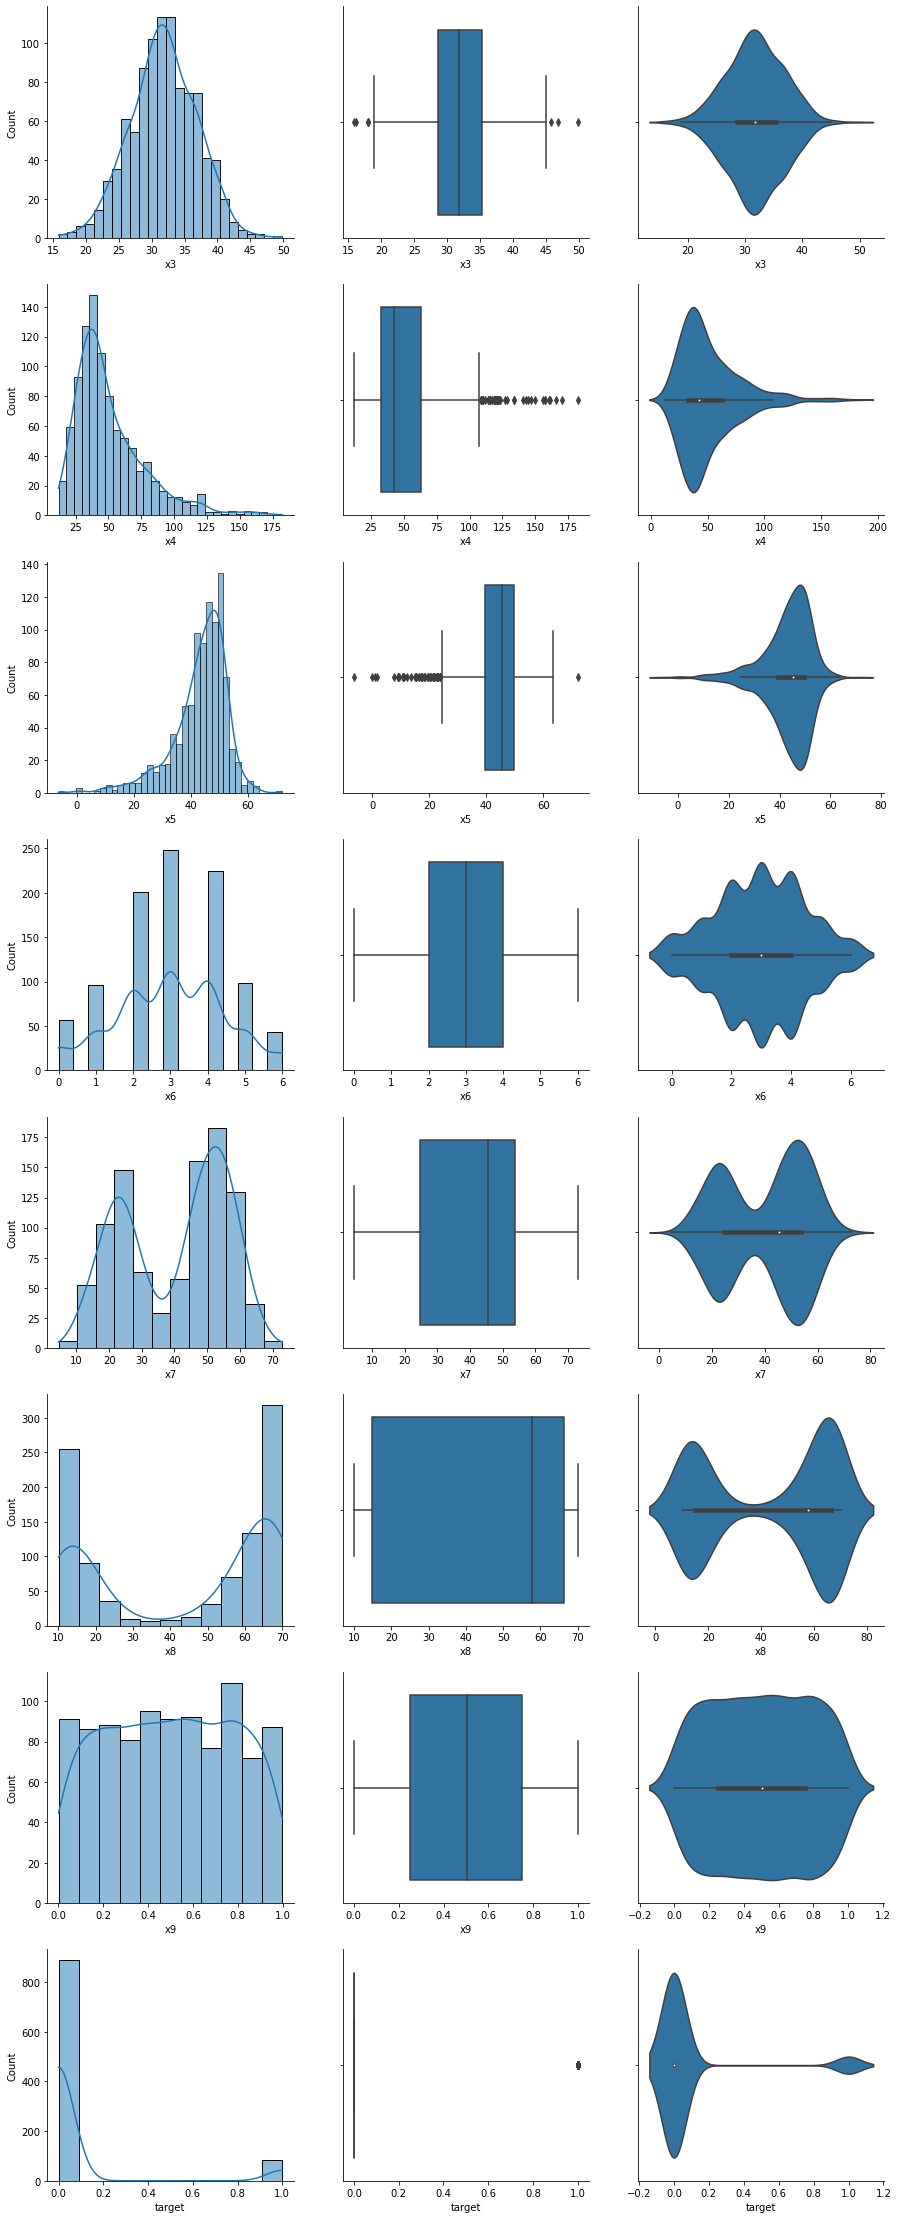

In [27]:
### answer ###
# numeric attributes are x3,x4,x5,x6,x7,x8 and x9
data_wo_na_numeric = data_wo_na[['x3', 'x4','x5','x6','x7','x8','x9','target']] # selection of numeric attributes

f, axes = plt.subplots(8, 3, figsize=(15, 40))
sns.despine(right=True)
count=0
for i in range(8):      
    sns.histplot(data_wo_na_numeric.iloc[:,count], ax=axes[i,0], kde=True)
    sns.boxplot(x=data_wo_na_numeric.iloc[:,count], ax=axes[i,1])
    sns.violinplot(x=data_wo_na_numeric.iloc[:,count], ax=axes[i,2])
    count=count+1

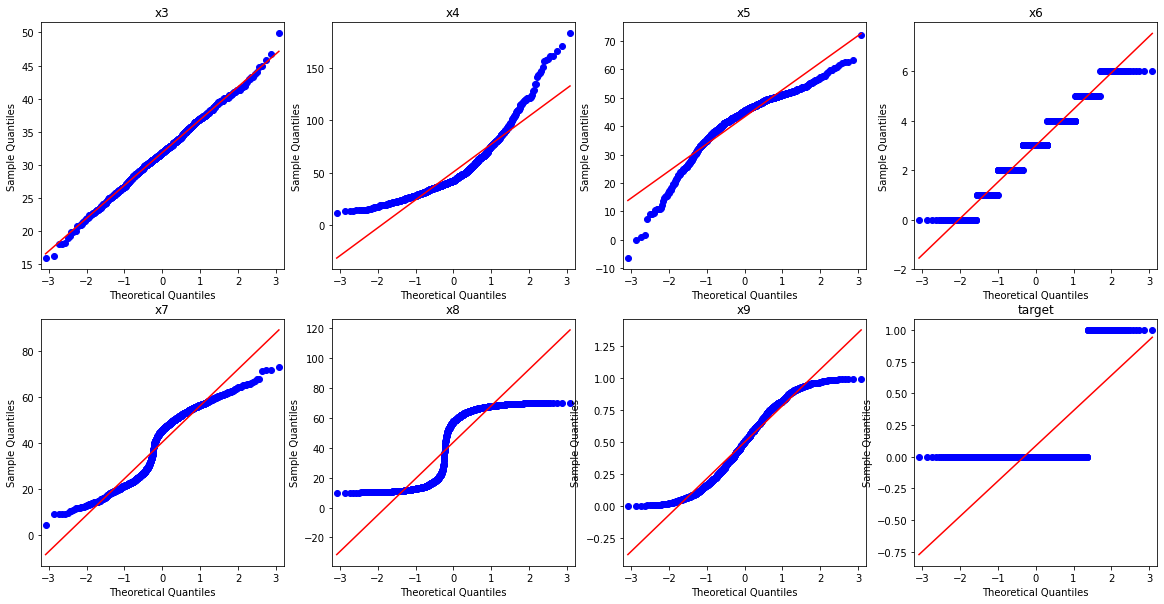

In [28]:
f, axes = plt.subplots(2, 4, figsize=(20, 10))
count=0
for i in range(2):
    for j in range(4): 
        axes[i,j].set_title(data_wo_na_numeric.columns[count])
        sm.qqplot(data_wo_na_numeric.iloc[:,count], line="s", ax=axes[i,j])
        count=count+1

We can use QQ-plots to understand the distribution of the data is normal or not. 
* The scatter of symmetric data tends to fit the diagonal line (NORMAL)
* The scatter of skewed data tends to form curves moving away from the line at the ends while looking at the QQ Plot. (NOT NORMAL)

Also, we can look at histogram of distributions as appropriate visualization techniques.

x3: It is similar to Gaussian/Normal distribution since its histogram is like normal distribution and its mean(31.822786) and median(31.822000) are almost same. Also, its Q-Q plot tends to fit the diagonal line and it has one peak, so it is unimodal.

x4: It is not similar to Normal distribution since its histogram shows it is right-skewed and its Q-Q plot tends to form curves moving away from the line. Also, its mean is greater than median and it has one peak, so it is unimodal.

x5: It is not similar to Normal distribution since its histogram shows it is left-skewed and its Q-Q plot tends to form curves moving away from the line. Also, its median is greater than mean and it has one peak, so it is unimodal.

x6: It is not similar to Normal distribution since its histogram and violin plot shows it has multiple peaks and its Q-Q plot does not tend to fit the diagonal line (stepwise). Although its median and mean are almost same, it has multiple peaks.

x7: It is not similar to Normal distribution since its histogram and violin plot shows it has two peaks(bimodal) and its Q-Q plot tends to form curves moving away from the line.Also, Its median is greater than its mean.

x8: It is not similar to Normal distribution since its histogram and violin plot shows it has two peaks(bimodal) and its Q-Q plot tends to form curves moving away from the line.Also, Its median is greater than its mean.

x9: It is not similar to Normal distribution since its histogram and violin plot shows it has no exact one peak and its Q-Q plot tends to form curves moving away from the line.Although its median and mean are almost same, it has no one peak.

target: It is not similar to Normal distribution since its histogram and violin plot shows it has two peaks and its Q-Q plot does not tend to fit the diagonal line. Also, mean is a bit greater than median.

**12. For categoric and ordinal attributes draw countplots and briefly comment on them. While commenting please consider which descriptive statistics is meaningful for each of the attributes. Can we say anything about the distribution of the categoric and ordinal attributes?**  
Hint: You can use seaborn library. Please see the documentation via https://seaborn.pydata.org/api.html.

C:\Users\ozan\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ozan\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ozan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


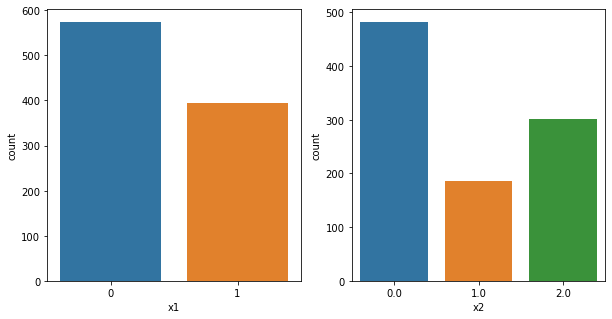

In [29]:
### answer ###
data_wo_na_categoric = data_wo_na[['x1','x2']] # selection of categoric and ordinal attributes
fig, ax =plt.subplots(1,2, figsize=(10, 5))
sns.countplot(data_wo_na_categoric['x1'], ax=ax[0])
sns.countplot(data_wo_na_categoric['x2'], ax=ax[1])
fig.show()

While x1 has two categories that are 0 and 1, x2 has three catagories that are 0,1 and 2.

The best numerical summaries for categorical and ordinal attributes involve frequencies and percent. As we can see from above graph for x1, frequency of "0" is higher than "1". As we can see from above graph for x2, frequency of "0" is the highest and frequency of "1" is the lowest.

We can say about relative frequency of attributes regarding meaningful descriptive statistics. On the other hand, mean and median are more appropriate for numerical attributes. Distribution of the categorical and ordinal attributes can be explained by using its frequencies. For example, "x1" has just two values that are 0 and 1, so its distribution looks like bimodal.

**Reference: https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_summarizingdata/BS704_SummarizingData_print.html**

**13. Determine the appropriate descriptive location measure for each of the numerical attributes.**

Appropriate descriptive location measure:

Which measure of location is the best?
Mean is generally used, unless extreme values (outliers) exist. The median is often used, since the median is not sensitive to extreme values.

Thanks to Box-plot graphs in Q11, outliers can be determined.

x3:median
x4:median
x5:median
x6:mean
x7:mean
x8:mean
x9:mean
target:median

**Reference**: Lecture03_Understanding_Data Slide No: 44 at Notes

https://www.slideshare.net/anwarafridi181/bbs10-ppt-ch03
Which measure of location is the best?
Mean is generally used, unless extreme values (outliers) exist
The median is often used, since the median is not sensitive to extreme values.

**14. Find out whether there are any outliers and make one suggestion regarding how to deal with them.**

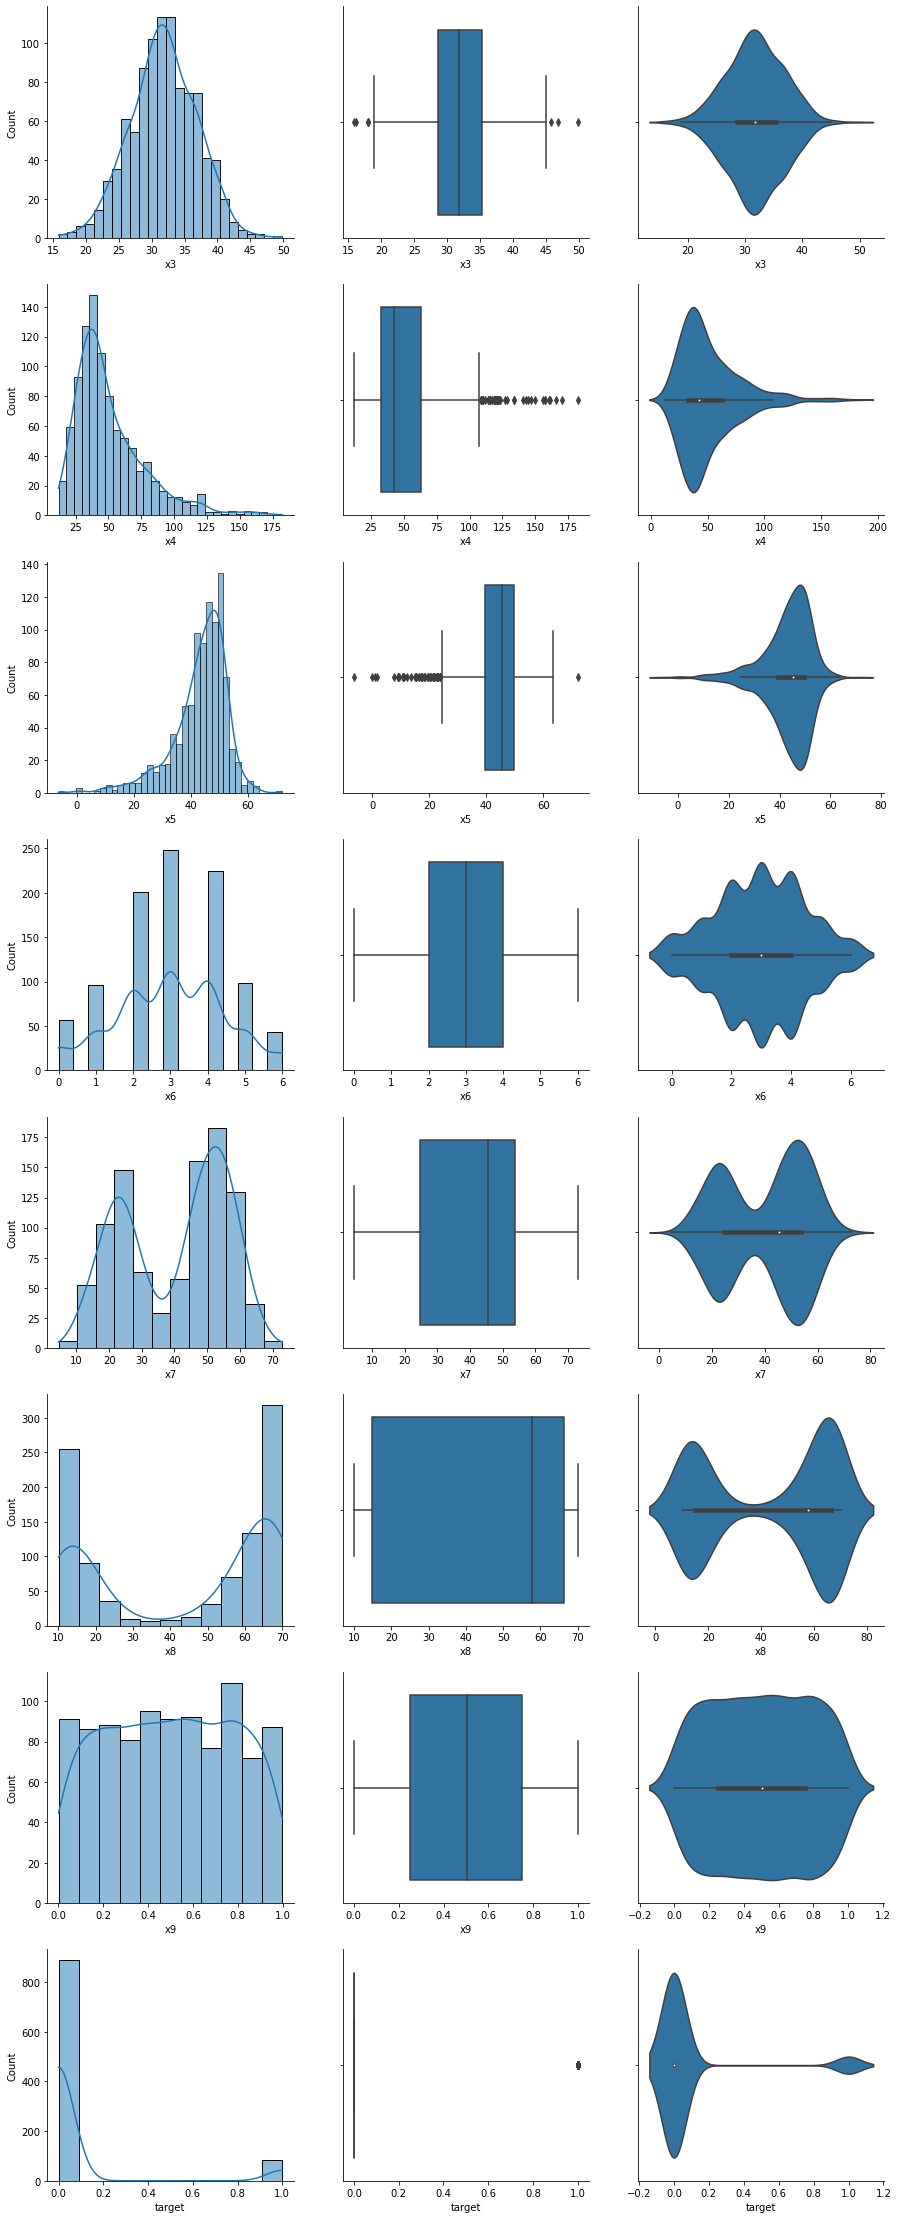

In [30]:
### answer ###
data_wo_na_numeric = data_wo_na[['x3', 'x4','x5','x6','x7','x8','x9','target']] # selection of numeric attributes

f, axes = plt.subplots(8, 3, figsize=(15, 40))
sns.despine(right=True)
count=0
for i in range(8):      
    sns.histplot(data_wo_na_numeric.iloc[:,count], ax=axes[i,0], kde=True)
    sns.boxplot(x=data_wo_na_numeric.iloc[:,count], ax=axes[i,1])
    sns.violinplot(x=data_wo_na_numeric.iloc[:,count], ax=axes[i,2])
    count=count+1

Thanks to Box-plot graphs above, outliers can be determined. Our suggestion is that we can replace values of outliers with 3rd Quartile and 1st Quartile depending on position of outliers. If outliers are lower than 1st Quartile-1.5*IQR (InterQuartileRange), we replace it with 1st Quartile. If outliers are higher than 3rd Quartile+1.5*IQR(InterQuartileRange), we replace it with 3rd Quartile.

**15. Visualize the distributions of numeric attributes grouped by the target variable using violin plots. Comment on the results.**  
Hint: Please see the seaborn library documentation via https://seaborn.pydata.org/api.html.

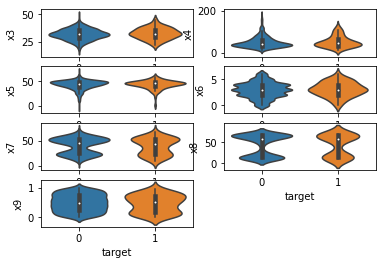

In [31]:
plt.subplot(4,2,1)
sns.violinplot(x="target", y="x3", data=data_wo_na_numeric);
plt.subplot(4,2,2)
sns.violinplot(x='target', y='x4', data=data_wo_na_numeric);
plt.subplot(4,2,3)
sns.violinplot(x='target', y='x5', data=data_wo_na_numeric);
plt.subplot(4,2,4)
sns.violinplot(x='target', y='x6', data=data_wo_na_numeric);
plt.subplot(4,2,5)
sns.violinplot(x='target', y='x7', data=data_wo_na_numeric);
plt.subplot(4,2,6)
sns.violinplot(x='target', y='x8', data=data_wo_na_numeric);
plt.subplot(4,2,7)
sns.violinplot(x='target', y='x9', data=data_wo_na_numeric);

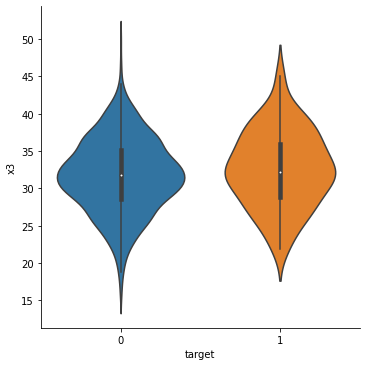

In [32]:
sns.catplot(x= "target", y = "x3", kind = "violin", data = data_wo_na_numeric);

Distribution of "x3" looks like similar regarding class of target (0 and 1). However, distribution of "x3" when "target" is 0 is a bit scatterer than 1. Distribution of "x3" is bell-shaped in two of them.

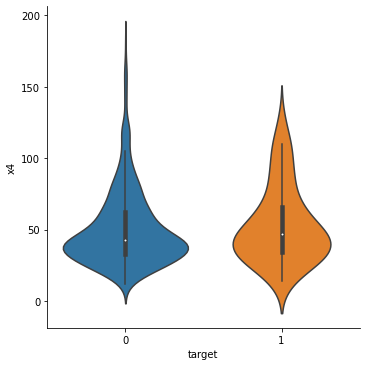

In [33]:
sns.catplot(x= "target", y = "x4", kind = "violin", data = data_wo_na_numeric);

Distribution of "x4" looks like similar regarding class of target (0 and 1). However, distribution of "x4" when "target" is 0 is scatterer than 1. Distribution of "x4" is right-skewed.

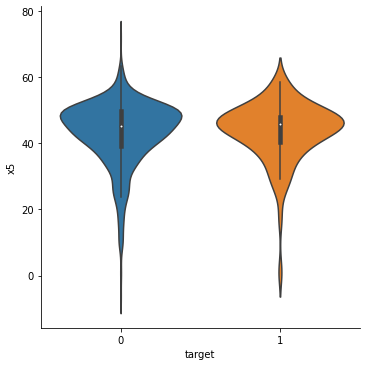

In [34]:
sns.catplot(x= "target", y = "x5", kind = "violin", data = data_wo_na_numeric);

Distribution of "x5" looks like similar regarding class of target (0 and 1). However, distribution of "x5" when "target" is 0 is scatterer than 1. Distribution of "x5" is left-skewed.

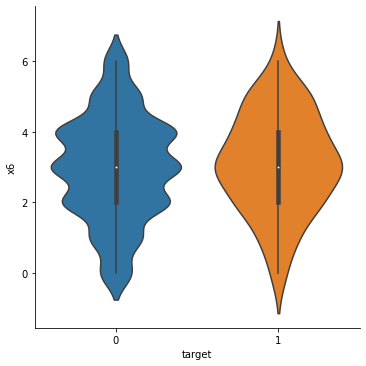

In [35]:
sns.catplot(x= "target", y = "x6", kind = "violin", data = data_wo_na_numeric);

Distribution of "x6" does not like similar regarding class of target (0 and 1) in a way that distribution of "x6" when "target" is 0 looks like multimodal; whereas, distribution of "x6" when "target" is 1 looks like bell-shaped.

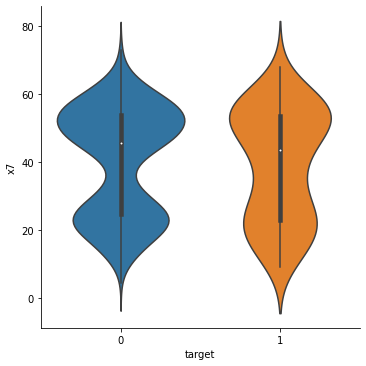

In [36]:
sns.catplot(x= "target", y = "x7", kind = "violin", data = data_wo_na_numeric);

Distribution of "x7" looks like similar regarding class of target (0 and 1). They are bimodal.

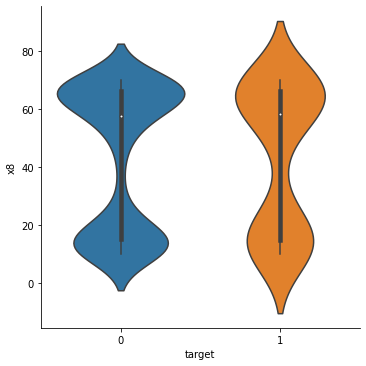

In [37]:
sns.catplot(x= "target", y = "x8", kind = "violin", data = data_wo_na_numeric);

Distribution of "x8" looks like similar regarding class of target (0 and 1). They are bimodal.

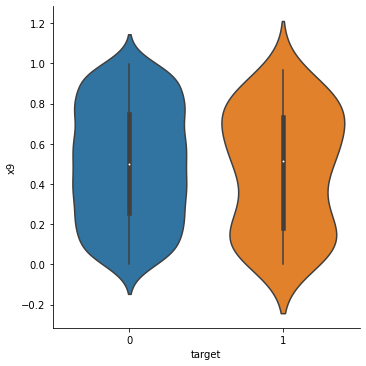

In [38]:
sns.catplot(x= "target", y = "x9", kind = "violin", data = data_wo_na_numeric);

Distribution of "x9" does not like similar regarding class of target (0 and 1) in a way that distribution of "x6" when "target" is 0 looks like multimodal and it is not bell-shaped; whereas, distribution of "x9" when "target" is 1 looks like bimodal.

**16. What does the below violin plot show? Explain.**

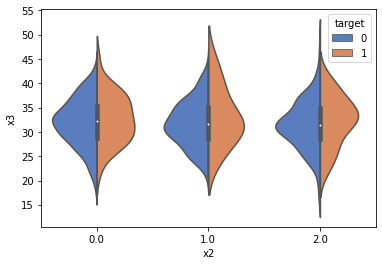

In [39]:
### answer ###
ax = sns.violinplot(x="x2",y="x3", hue="target",  data=data_wo_na, palette="muted", split=True)

Violin plot shows distribution of data in accordance with values of "x3" grouped by "x2" (first grouped) and "target" (second grouped) by using "data_wo_na". Violin plot is a combination of box plot and density plot.

Note: Split=True.  setting ``split`` to True will draw half of a violin for each level. This can make it easier to directly compare the distributions.

